In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
pokemon_data=pd.read_csv('pokemon.csv')
pokemon_data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
pokemon_data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [4]:
pokemon_data.shape

(800, 12)

In [5]:
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


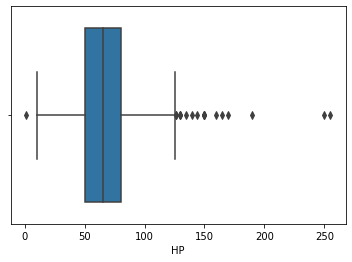

In [6]:
sns.boxplot(x='HP',data=pokemon_data)

In [7]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [8]:
outlier_pt=detect_outliers(pokemon_data['HP'])
pokemon_data['HP']=pokemon_data['HP'].sort_values()
pokemon_data['HP']=pokemon_data[pokemon_data['HP']<min(outlier_pt)]

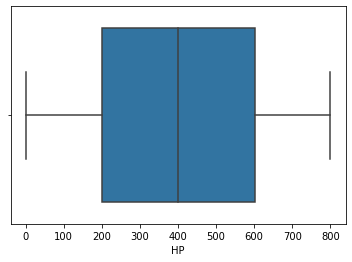

In [9]:
sns.boxplot(x='HP',data=pokemon_data)

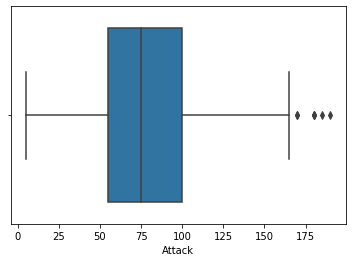

In [10]:
sns.boxplot(x='Attack',data=pokemon_data)

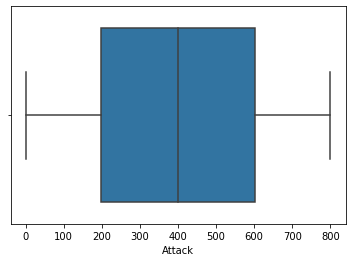

In [11]:
outlier_pt=detect_outliers(pokemon_data['Attack'])
pokemon_data['Attack']=pokemon_data['Attack'].sort_values()
pokemon_data['Attack']=pokemon_data[pokemon_data['Attack']<min(outlier_pt)]
sns.boxplot(x='Attack',data=pokemon_data)

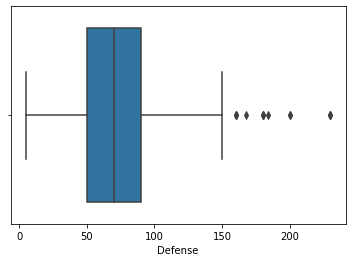

In [12]:
sns.boxplot(x='Defense',data=pokemon_data)

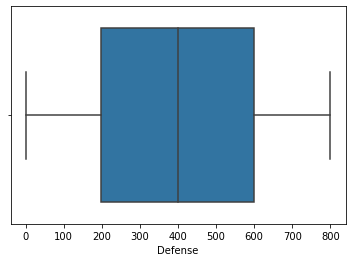

In [13]:
outlier_pt=detect_outliers(pokemon_data['Defense'])
pokemon_data['Defense']=pokemon_data['Defense'].sort_values()
pokemon_data['Defense']=pokemon_data[pokemon_data['Defense']<min(outlier_pt)]
sns.boxplot(x='Defense',data=pokemon_data)


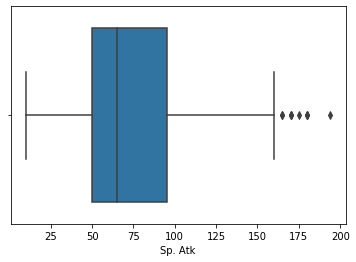

In [14]:
sns.boxplot(x='Sp. Atk',data=pokemon_data)

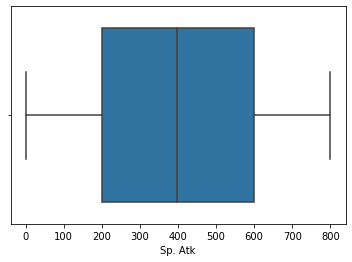

In [15]:
outlier_pt=detect_outliers(pokemon_data['Sp. Atk'])
pokemon_data['Sp. Atk']=pokemon_data['Sp. Atk'].sort_values()
pokemon_data['Sp. Atk']=pokemon_data[pokemon_data['Sp. Atk']<min(outlier_pt)]
sns.boxplot(x='Sp. Atk',data=pokemon_data)

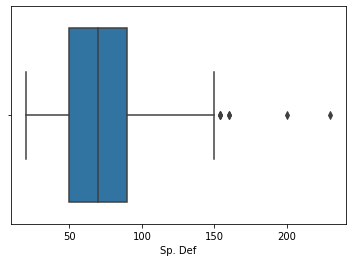

In [16]:
sns.boxplot(x='Sp. Def',data=pokemon_data)

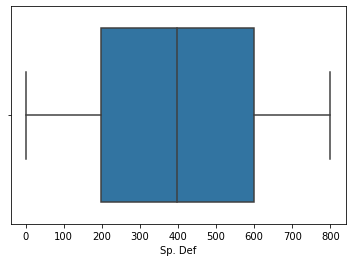

In [17]:
outlier_pt=detect_outliers(pokemon_data['Sp. Def'])
pokemon_data['Sp. Def']=pokemon_data['Sp. Def'].sort_values()
pokemon_data['Sp. Def']=pokemon_data[pokemon_data['Sp. Def']<min(outlier_pt)]
sns.boxplot(x='Sp. Def',data=pokemon_data)

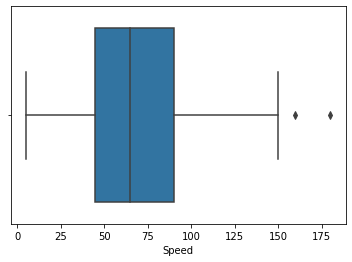

In [18]:
sns.boxplot(x='Speed',data=pokemon_data)

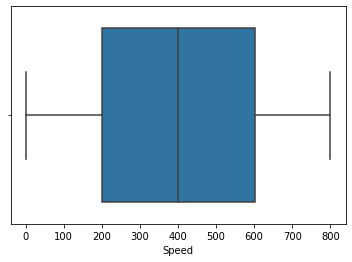

In [19]:
outlier_pt=detect_outliers(pokemon_data['Speed'])
pokemon_data['Speed']=pokemon_data['Speed'].sort_values()
pokemon_data['Speed']=pokemon_data[pokemon_data['Speed']<min(outlier_pt)]
sns.boxplot(x='Speed',data=pokemon_data)

In [20]:
pokemon_data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP             10
Attack         29
Defense        20
Sp. Atk        24
Sp. Def        14
Speed           6
Generation      0
Legendary       0
dtype: int64

In [21]:
pokemon_data['Type 2']=pokemon_data['Type 2'].fillna('Unknown')
pokemon_data=pokemon_data[pokemon_data['Name'].notna()]
pokemon_data=pokemon_data.fillna(pokemon_data.mean())

In [22]:
pokemon_data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [23]:
pokemon_data = pd.get_dummies(pokemon_data, columns = ['Type 1', 'Type 2'])

In [24]:
pokemon_data.head()

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Unknown,Type 2_Water
0,1,Bulbasaur,1.0,1.0,1.0,1.0,1.0,1.0,1,False,...,0,0,0,0,1,0,0,0,0,0
1,2,Ivysaur,2.0,2.0,2.0,2.0,2.0,2.0,1,False,...,0,0,0,0,1,0,0,0,0,0
2,3,Venusaur,3.0,3.0,3.0,3.0,3.0,3.0,1,False,...,0,0,0,0,1,0,0,0,0,0
3,4,Mega Venusaur,4.0,4.0,4.0,4.0,4.0,4.0,1,False,...,0,0,0,0,1,0,0,0,0,0
4,5,Charmander,5.0,5.0,5.0,5.0,5.0,5.0,1,False,...,0,0,0,0,0,0,0,0,1,0


In [25]:
numerical_features=[feature for feature in pokemon_data.columns if pokemon_data[feature].dtypes!='O']

In [26]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(pokemon_data[numerical_features])
pokemon_data.head()

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Unknown,Type 2_Water
0,1,Bulbasaur,1.0,1.0,1.0,1.0,1.0,1.0,1,False,...,0,0,0,0,1,0,0,0,0,0
1,2,Ivysaur,2.0,2.0,2.0,2.0,2.0,2.0,1,False,...,0,0,0,0,1,0,0,0,0,0
2,3,Venusaur,3.0,3.0,3.0,3.0,3.0,3.0,1,False,...,0,0,0,0,1,0,0,0,0,0
3,4,Mega Venusaur,4.0,4.0,4.0,4.0,4.0,4.0,1,False,...,0,0,0,0,1,0,0,0,0,0
4,5,Charmander,5.0,5.0,5.0,5.0,5.0,5.0,1,False,...,0,0,0,0,0,0,0,0,1,0


In [27]:
pokemon_data.drop('#',axis=1,inplace=True)
pokemon_data.drop('Name',axis=1,inplace=True)


In [28]:
pokemon_data

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,Type 1_Dark,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Unknown,Type 2_Water
0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1,False,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2.0,2.000000,2.000000,2.000000,2.000000,2.0,1,False,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.0,3.000000,3.000000,3.000000,3.000000,3.0,1,False,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.0,4.000000,4.000000,4.000000,4.000000,4.0,1,False,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5.0,5.000000,5.000000,5.000000,5.000000,5.0,1,False,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796.0,796.000000,400.525032,796.000000,398.842038,796.0,6,True,0,0,...,0,0,0,0,0,0,0,0,0,0
796,797.0,400.705195,797.000000,400.136774,797.000000,797.0,6,True,0,0,...,0,0,0,0,0,0,0,0,0,0
797,798.0,798.000000,798.000000,400.136774,798.000000,798.0,6,True,0,0,...,0,0,0,0,0,0,0,0,0,0
798,799.0,400.705195,799.000000,400.136774,799.000000,799.0,6,True,0,0,...,0,0,0,0,0,0,0,0,0,0
